In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# root_dir of where the data is
root_dir = '../../data/'

# Location of images.
image_dir = root_dir + 'images/'

# Location of where to write features.
feature_dir = root_dir + 'features/'

# The .csv file containing the image names and classes.
image_file = root_dir + 'image_names_classes.csv'

In [3]:
# Number of images.
n_images = 218

# Read image names and classes .csv file.
image_names_classes = pd.read_csv(image_file, header=None )

In [4]:
# Read the features from the .csv file.
feature_filename = feature_dir + 'mean_stdev.txt'
features = np.genfromtxt(feature_filename, delimiter=',')

# Determine feature dimension.
fdim = np.shape(features)[1]

In [5]:
# Use first image as query.
query_image = 0

# Compute Euclidean distance between query feature vector and each image's feature vector.
distances = np.zeros(n_images)

for i in range(n_images):
    distances[i] = 0
    for j in range(fdim):
        distances[i] = distances[i] + ((features[query_image][j] - features[i][j])**2)
    distances[i] = distances[i] ** 0.5


In [6]:
# Get the indices of the sorted distances.
sorted_index = np.argsort(distances)
print(sorted_index)

[  0  21 139  81   2   1   5 138  69  11 156 150 162  90  96  94  63 181
  68  17  56  16 207  93 206 109 120  52  10  55  33 167  24 124 126  42
 172 174 170 112 196  36 133 161 151  27 217  43  66  92 147 134 157  98
  50  29 169  26 165  70 102 104  65 110  67 208  97 180   7   9 203  30
 191 131  73 216 118  32 178  20 195 175   8  46 209 192 171 210 179 177
 108 205  75 198 140 173 176 132 111 105 154 164 189  18 197 193  80 106
  77 119  40  39 137 182 141 158  31 168  60 194 183 113  59 125  91  49
  34  53 143  62 211 144 214  44 204 146 186  95  83  12 215  76 135  74
  19 128 130  38  48 187 163 155  85 129 202 213 185  99 184 153  47  78
 123 100 149  58 142  13 115  37  86  87 103  41 148  79 136 212 201 159
  57 127 107 152  45 166 114 160  54  72 190  28  89   3 121  84  88 145
   6 188  14 199  71 101  51 200  64  23 122  35 117 116   4  15  82  22
  61  25]


In [7]:
# Retrieve top k images.
k = 5

# Print the distances of the top k images.
print(distances[sorted_index[0:k]])

[0.         0.00327618 0.00331767 0.00389679 0.00798157]


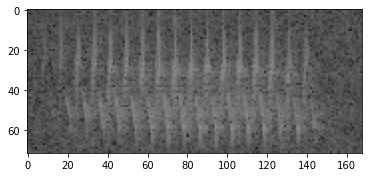

In [8]:
# Show the query image.
filename = image_dir + image_names_classes[0][query_image]
im = plt.imread(filename)
plt.imshow(im,cmap='gray')

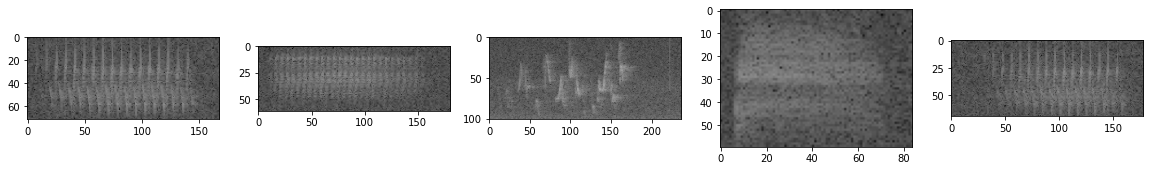

In [9]:
# Show top k images.
fig, axs = plt.subplots(1, k, figsize=(20,20))

for i in range(k):
    filename = image_dir + image_names_classes[0][sorted_index[i]]
    im = plt.imread(filename)
    axs[i].imshow(im,cmap='gray')
